<a href="https://colab.research.google.com/github/21F21604/AI-shopping-system/blob/main/Asian_vs_African_Elephants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
train_dir = '/content/drive/MyDrive/Asian_African/train'
test_dir = '/content/drive/MyDrive/Asian_African/test'

In [6]:
import os
print(len(os.listdir('/content/drive/MyDrive/Asian_African/train/Asian')))
print(len(os.listdir('/content/drive/MyDrive/Asian_African/train/African')))
print(len(os.listdir('/content/drive/MyDrive/Asian_African/test/Asian')))
print(len(os.listdir('/content/drive/MyDrive/Asian_African/test/African')))

420
430
91
97


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 680 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


In [8]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [12]:


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 270s 12s/step - accuracy: 0.5121 - loss: 0.8626 - val_accuracy: 0.5235 - val_loss: 0.6919
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.5530 - loss: 0.6916 - val_accuracy: 0.5647 - val_loss: 0.6881
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.6074 - loss: 0.6674 - val_accuracy: 0.5412 - val_loss: 0.6859
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.6455 - loss: 0.6468 - val_accuracy: 0.5706 - val_loss: 0.7190
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.6675 - loss: 0.6085 - val_accuracy: 0.5176 - val_loss: 0.7145
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.7287 - loss: 0.5467 - val_accuracy: 0.4941 - val_loss: 0.8150
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.7650 - loss: 0.4667 - val_accuracy: 0.5412 - val_loss: 0.8910
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.8049 - loss: 0.3869 - val_accuracy: 0.4471 - 

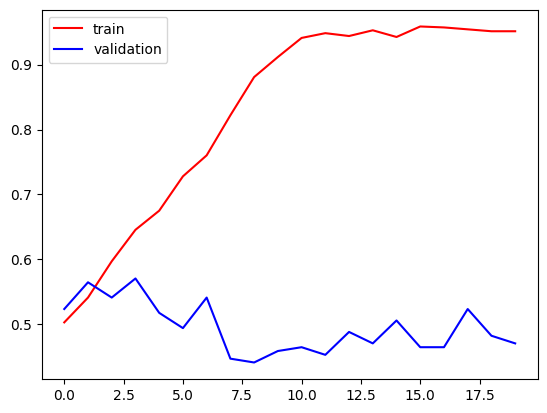

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

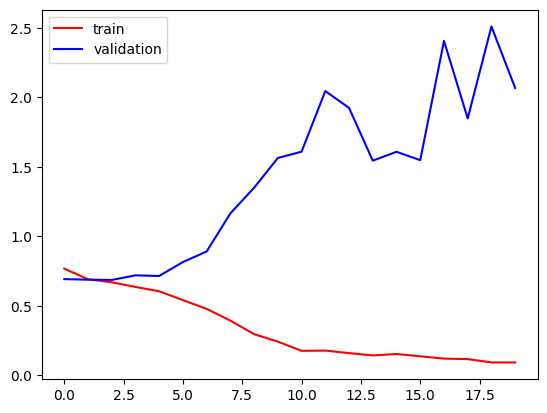

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [16]:
#predict the test data
predictions = model.predict(test_data)


6/6 ━━━━━━━━━━━━━━━━━━━━ 76s 15s/step


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[17 80]
 [18 73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.18      0.26        97
           1       0.48      0.80      0.60        91

    accuracy                           0.48       188
   macro avg       0.48      0.49      0.43       188
weighted avg       0.48      0.48      0.42       188



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting


In [18]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 181s 8s/step - accuracy: 0.4749 - loss: 9.8191 - val_accuracy: 0.4471 - val_loss: 4.5669
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 167s 8s/step - accuracy: 0.6001 - loss: 4.0240 - val_accuracy: 0.5941 - val_loss: 2.2801
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 169s 8s/step - accuracy: 0.6465 - loss: 3.0828 - val_accuracy: 0.5706 - val_loss: 7.1854
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.6383 - loss: 2.1945 - val_accuracy: 0.6176 - val_loss: 5.0650
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step - accuracy: 0.7561 - loss: 1.1725 - val_accuracy: 0.5176 - val_loss: 6.8209
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 171s 8s/step - accuracy: 0.7125 - loss: 1.5327 - val_accuracy: 0.4882 - val_loss: 5.1311
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 166s 7s/step - accuracy: 0.7017 - loss: 1.3366 - val_accuracy: 0.5000 - val_loss: 5.3683
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 170s 8s/step - accuracy: 0.7546 - loss: 1.0641 - val_accuracy: 0.5118 - v

In [21]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [22]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


In [23]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[29 68]
 [27 64]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.52      0.30      0.38        97
           1       0.48      0.70      0.57        91

    accuracy                           0.49       188
   macro avg       0.50      0.50      0.48       188
weighted avg       0.50      0.49      0.47       188



In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [25]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 206s 9s/step - accuracy: 0.5040 - loss: 2.7482 - val_accuracy: 0.5118 - val_loss: 0.7028
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 198s 9s/step - accuracy: 0.5293 - loss: 0.7181 - val_accuracy: 0.4941 - val_loss: 0.7908
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 193s 9s/step - accuracy: 0.5947 - loss: 0.6742 - val_accuracy: 0.5118 - val_loss: 0.7604
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 190s 9s/step - accuracy: 0.5620 - loss: 0.7339 - val_accuracy: 0.5529 - val_loss: 0.7140
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 205s 9s/step - accuracy: 0.6262 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.8709
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 197s 9s/step - accuracy: 0.5971 - loss: 0.6699 - val_accuracy: 0.5294 - val_loss: 0.7987
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 192s 9s/step - accuracy: 0.5623 - loss: 0.7454 - val_accuracy: 0.5824 - val_loss: 0.7406
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 192s 9s/step - accuracy: 0.5975 - loss: 0.6411 - val_accuracy: 0.5765 - v

In [27]:
predictions = resnet_model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 53s 8s/step


In [28]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[15 82]
 [18 73]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.45      0.15      0.23        97
           1       0.47      0.80      0.59        91

    accuracy                           0.47       188
   macro avg       0.46      0.48      0.41       188
weighted avg       0.46      0.47      0.41       188

